In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

In [155]:
"plot dendrogram function from scikit-learn's example"
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dn = dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix, dn


### Old dendogram generation

In [ ]:
data = pd.read_csv("../data/final_pca_dataset.csv")
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = 'ward')
"set linkage = Ward, Maximum or complete linkage, Average linkage, Single linkage"
model.fit(data)
plt.figure(figsize = (15, 10))
plt.title("World Sustainability Dendrogram")
"p determines depth of the dendrogram plot"
linkage_matrix, dn = plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


### Dendrogram Generation

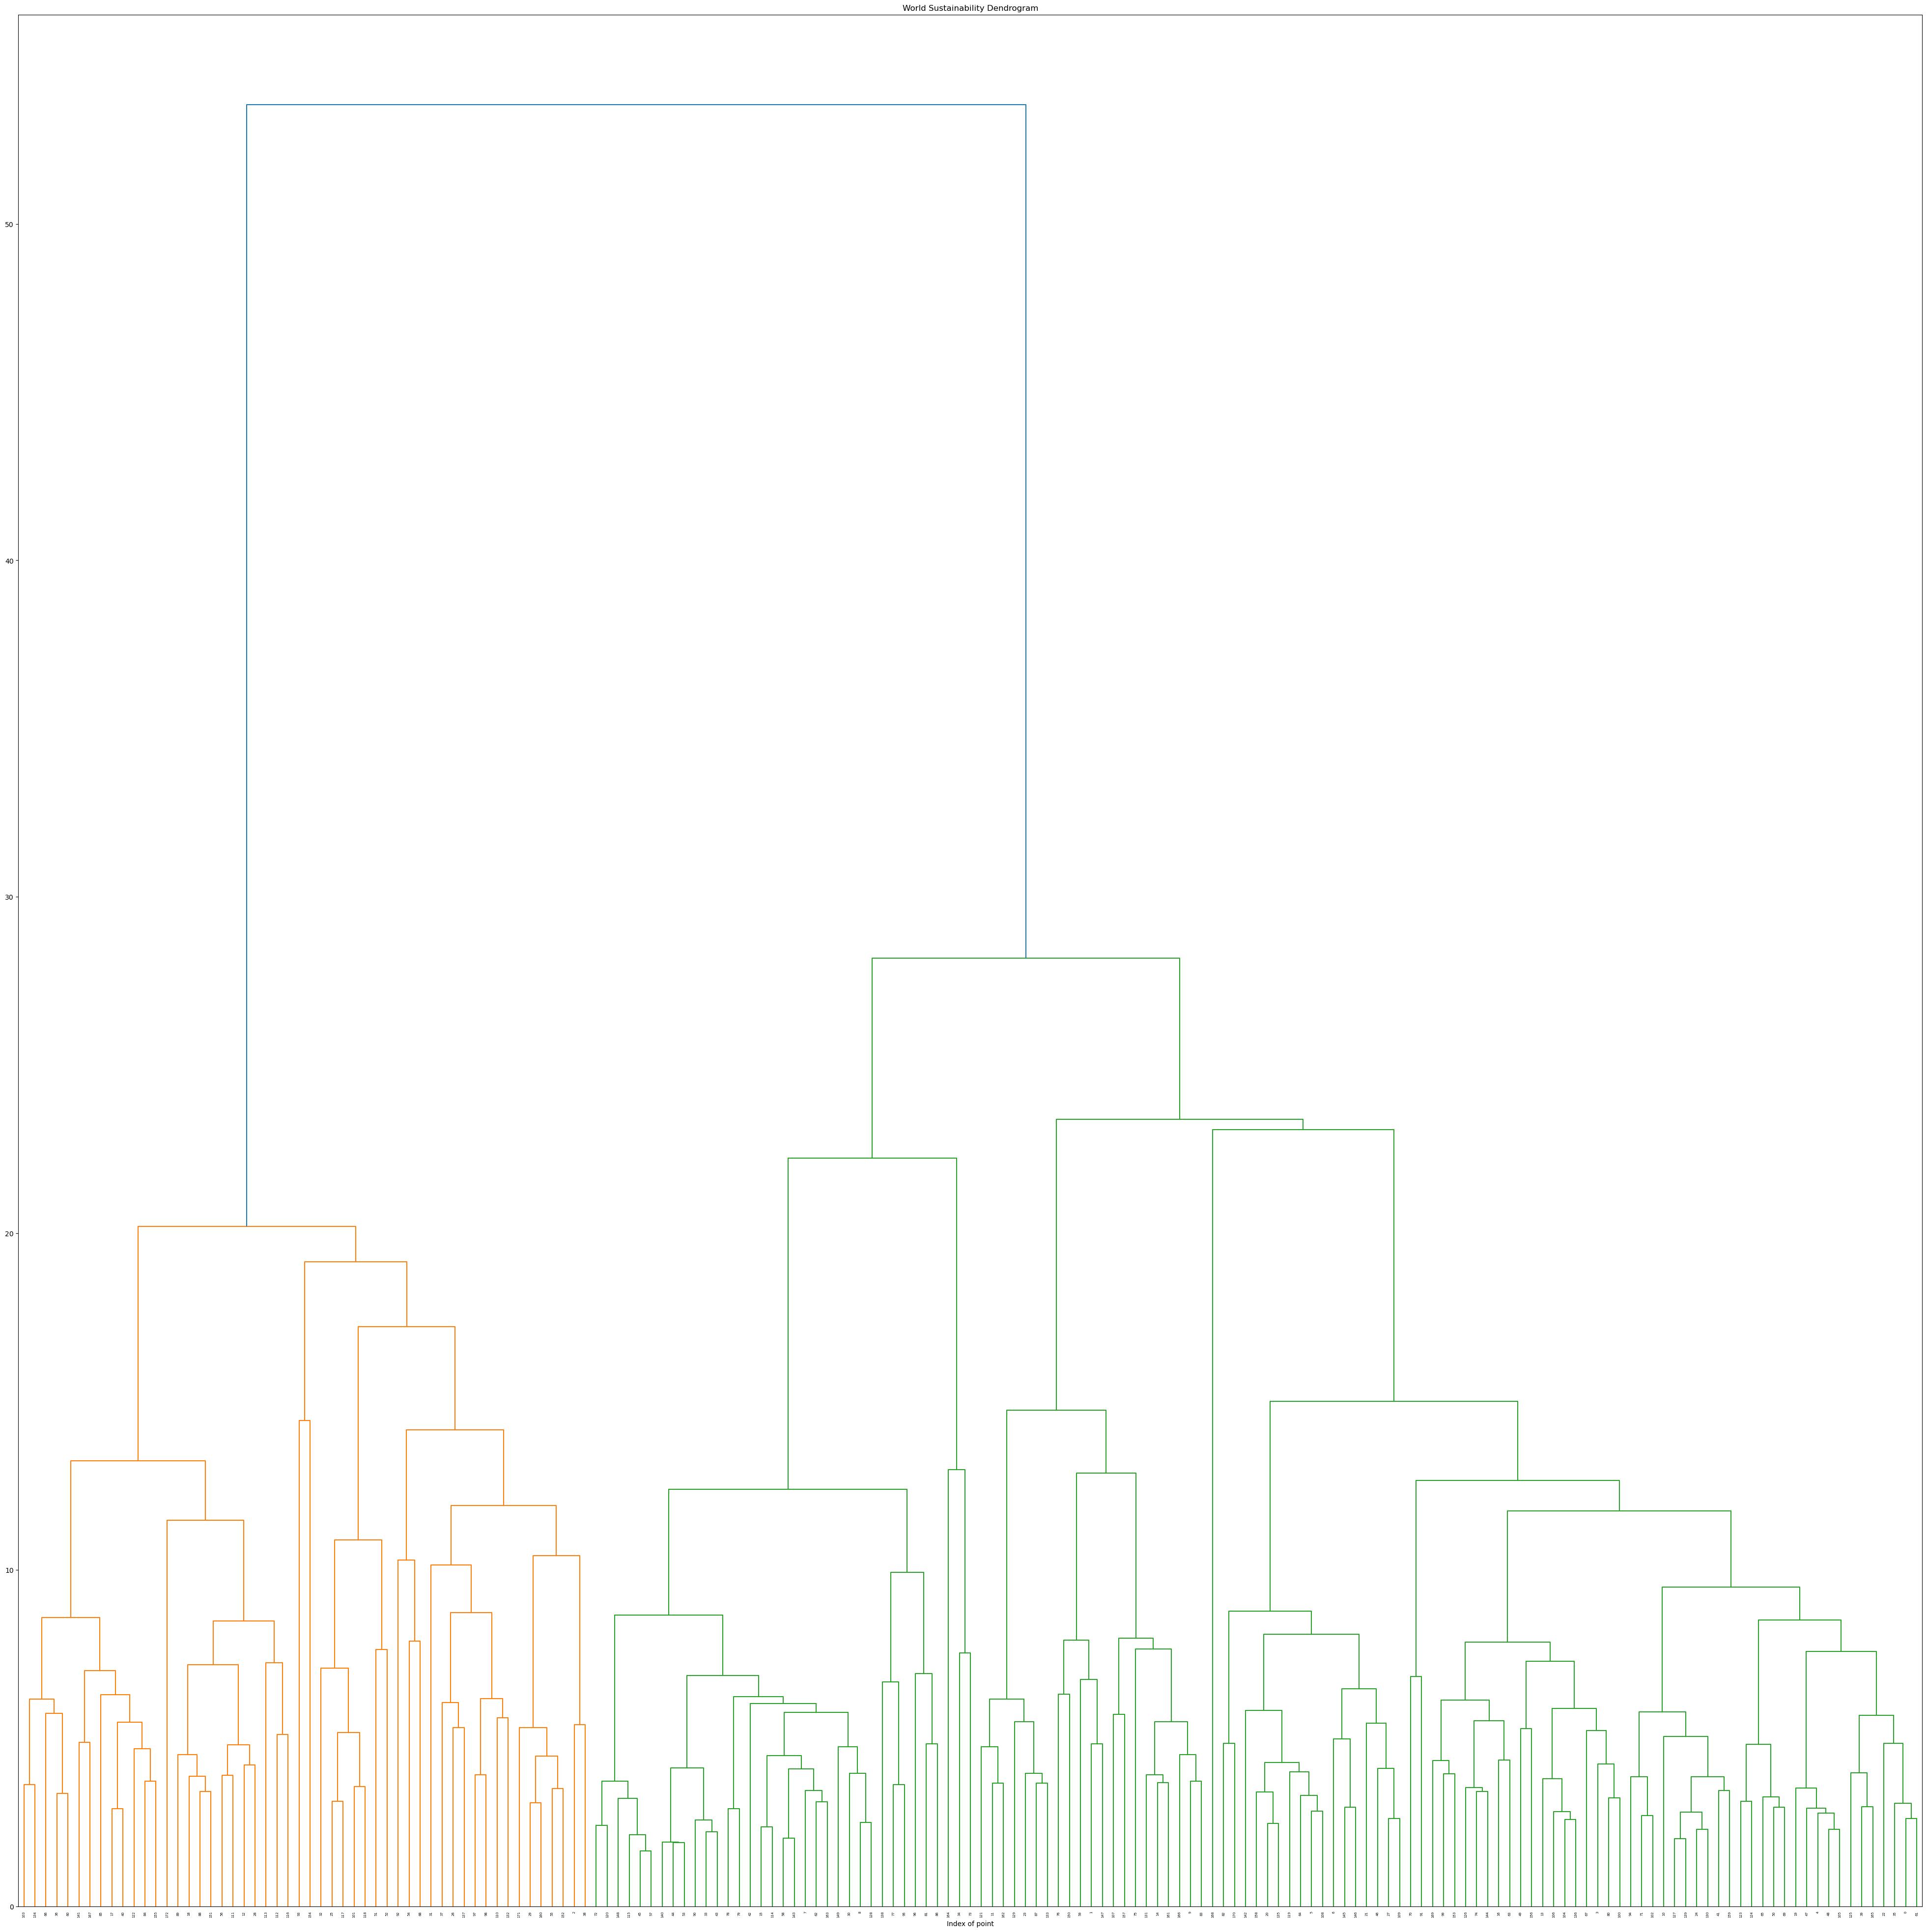

array([[ 45.        ,  57.        ,   1.63859177,   2.        ],
       [ 44.        ,  53.        ,   1.88994741,   2.        ],
       [140.        , 174.        ,   1.90087188,   3.        ],
       [127.        , 139.        ,   2.01059507,   2.        ],
       [ 58.        , 143.        ,   2.02071585,   2.        ],
       [115.        , 173.        ,   2.1303943 ,   3.        ],
       [ 33.        ,  43.        ,   2.21874849,   2.        ],
       [ 48.        , 105.        ,   2.28122269,   2.        ],
       [ 24.        , 130.        ,   2.28715035,   2.        ],
       [ 15.        , 114.        ,   2.36380808,   2.        ],
       [ 72.        , 120.        ,   2.40411764,   2.        ],
       [ 20.        , 135.        ,   2.46453695,   2.        ],
       [  8.        , 128.        ,   2.4899263 ,   2.        ],
       [ 90.        , 179.        ,   2.55922116,   3.        ],
       [104.        , 136.        ,   2.57177356,   2.        ],
       [  0.        ,  61

In [157]:
data = pd.read_csv("../data/final_pca_dataset.csv")
linkage_matrix = linkage(data, 'ward') 
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(linkage_matrix)
plt.title("World Sustainability Dendrogram")
plt.xlabel("Index of point")
plt.show()

linkage_matrix

### Visualizing Linkage Matrix

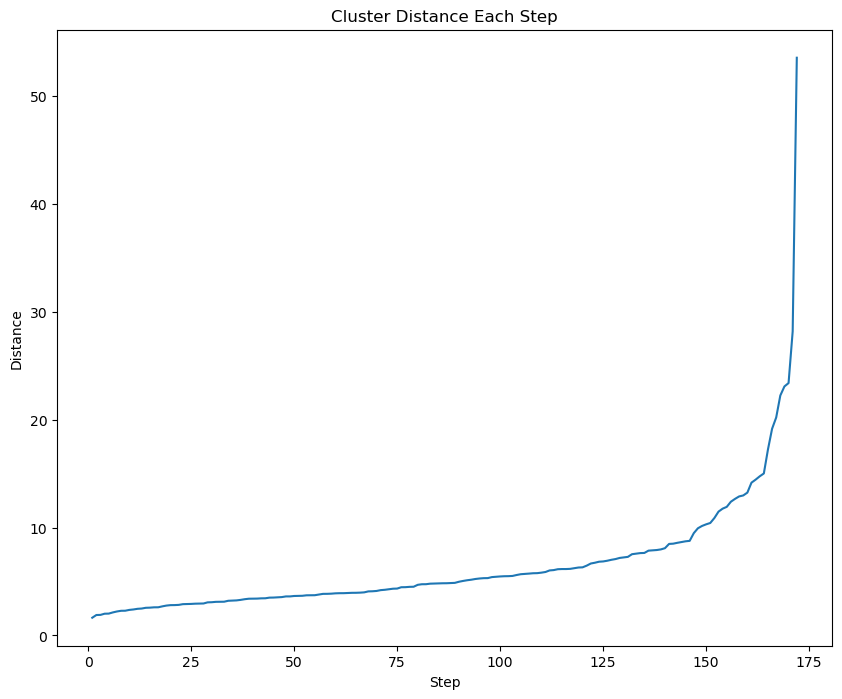

array([322.        , 327.        ,  14.15779591,  18.        ])

In [86]:
plt.figure(figsize=(10, 8))

plt.title('Cluster Distance Each Step')
steps = [i for i in range(1, linkage_matrix.shape[0] + 1)]
distances = linkage_matrix[:, 2]
plt.xlabel('Step')
plt.ylabel('Distance')
plt.plot(steps, distances)
plt.show()

### Determine Optimal number of clusters

In [80]:
unique_colors = set(dn['color_list'])
num_clusters = len(unique_colors) - 1
num_clusters

# why is the optimal number of clusters?
# what does unqiue_colors represent really?

# vertical lines represent distance from each cluster 
# distinct colors represent clusters of data with a relitavily large distacne between them 
# we subtract by 1 because of the top part conneccting 


2

### Label Data Points based on their clusters

In [81]:
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labeling = model.fit_predict(data)
cluster_labeling

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

### Merge PCA data with Meta Data Columns

In [113]:
sustain_w_regions = pd.read_csv("../data/sustainability_w_regions.csv")
data = pd.read_csv("../data/final_pca_dataset.csv")

rename = dict(zip(list(sustain_w_regions.columns), utils.feature_short_names))
df = sustain_w_regions.rename(rename, axis=1) 
df = df.sort_values(by=["Name", "Year"]).groupby("Name").bfill().ffill()
df = df.drop_duplicates(subset=['Alpha-2'], keep='last')
location_metadata = df[['region', 'sub-region']]

data.reset_index(drop=True, inplace=True)
location_metadata.reset_index(drop=True, inplace=True)

merged_data = pd.concat([data, location_metadata], axis=1)

# Add cluster Metadata column to dataset
merged_data["cluster"] = cluster_labeling
merged_data.to_csv('hierarchicalClusteringDataset.csv', index=False)

### Create Visualizations based on Region 

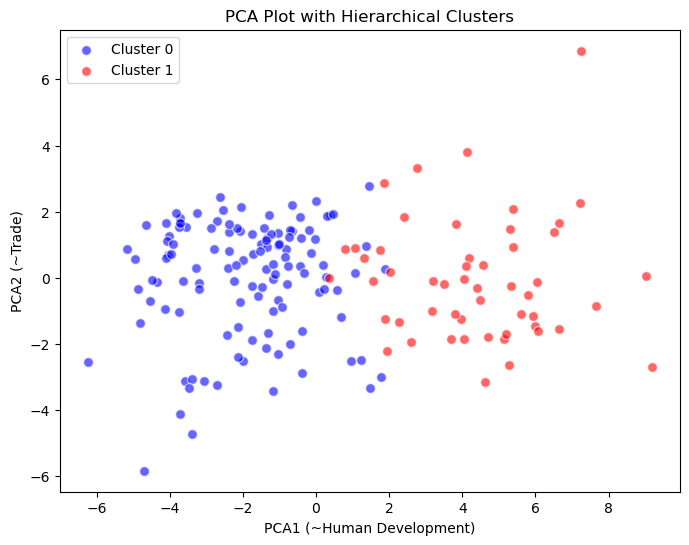

In [158]:
hierarchicalClusterData = pd.read_csv("../data/hierarchicalClusteringDataset.csv")
X_LABEL = "PCA1 (~Human Development)"
Y_LABEL = "PCA2 (~Trade)"

# Separate data points for each cluster
cluster_0 = hierarchicalClusterData[hierarchicalClusterData['cluster'] == 0]
cluster_1 = hierarchicalClusterData[hierarchicalClusterData['cluster'] == 1]

# Create scatter plots for each cluster with different colors and labels
plt.figure(figsize=(8, 6))
plt.scatter(x=cluster_0['PCA1'], y=cluster_0['PCA2'], c='blue', label='Cluster 0', s=50, alpha=0.6, edgecolors='w')
plt.scatter(x=cluster_1['PCA1'], y=cluster_1['PCA2'], c='red', label='Cluster 1', s=50, alpha=0.6, edgecolors='w')

# Add legend and labels
plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.title('PCA Plot with Hierarchical Clusters')
plt.show()

### Region/Sub-Region Markers

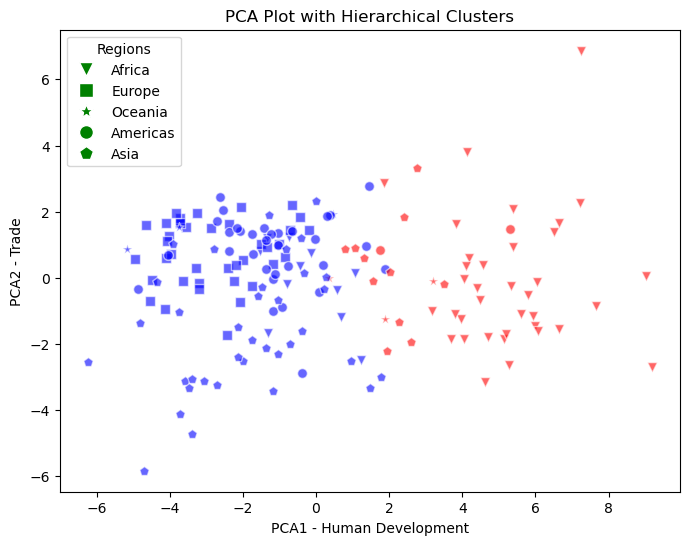

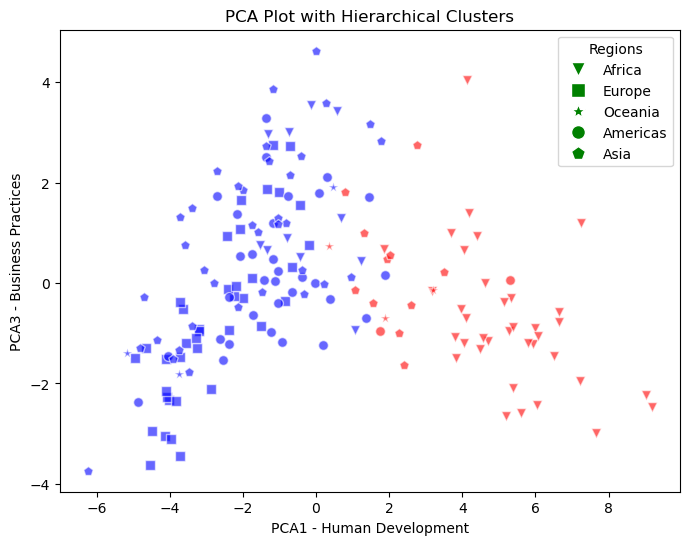

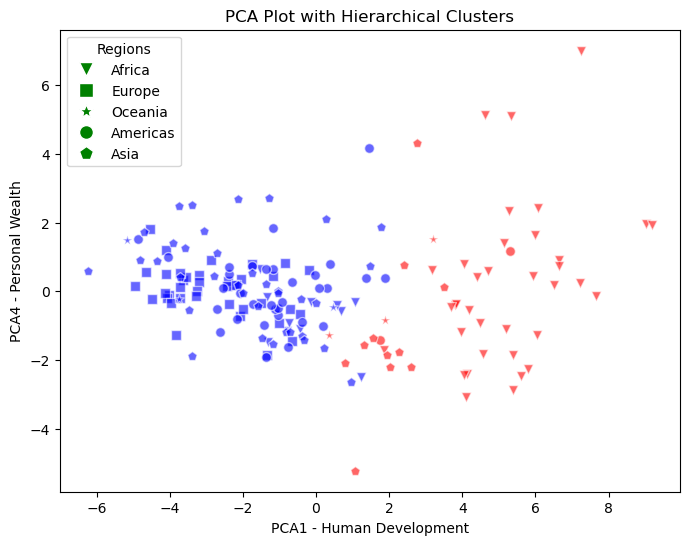

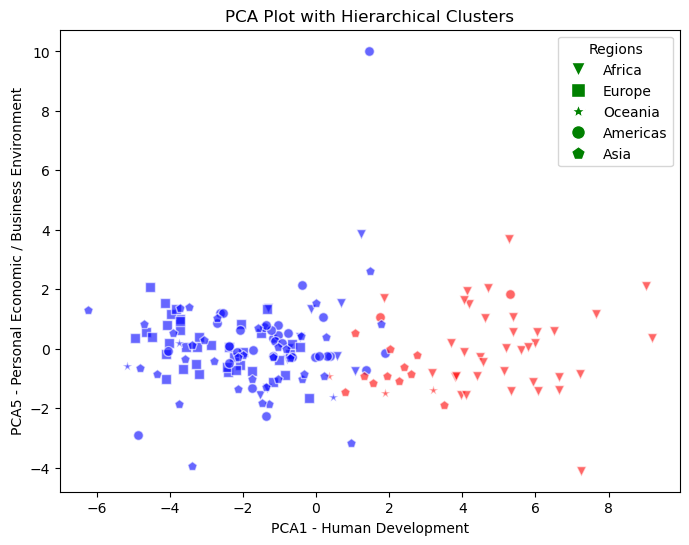

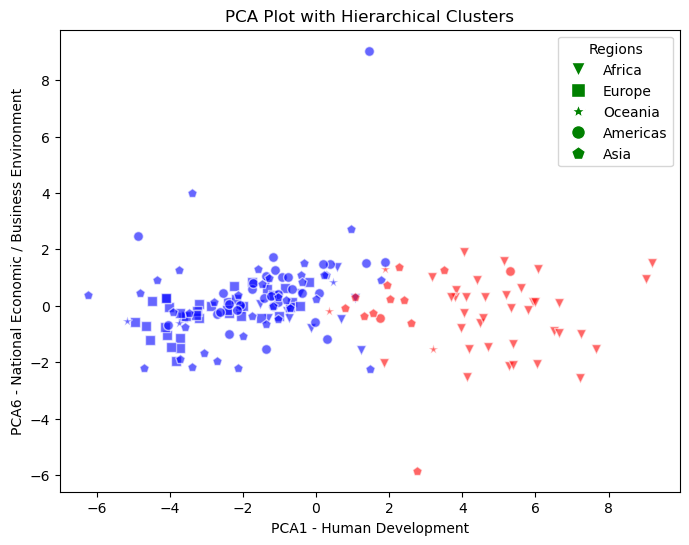

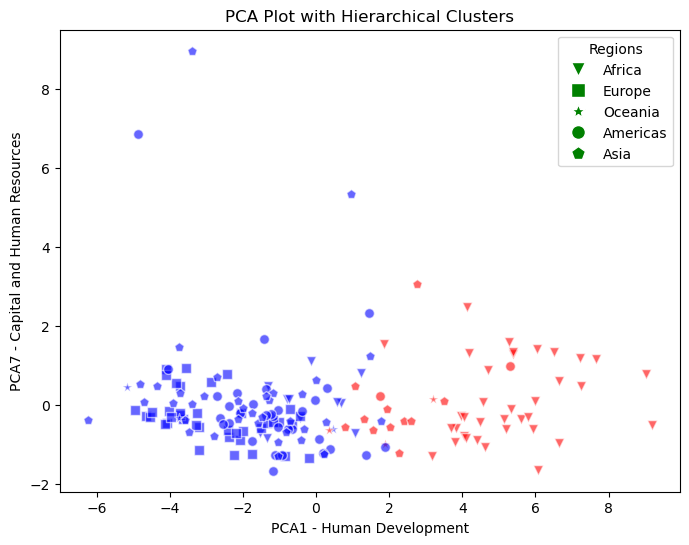

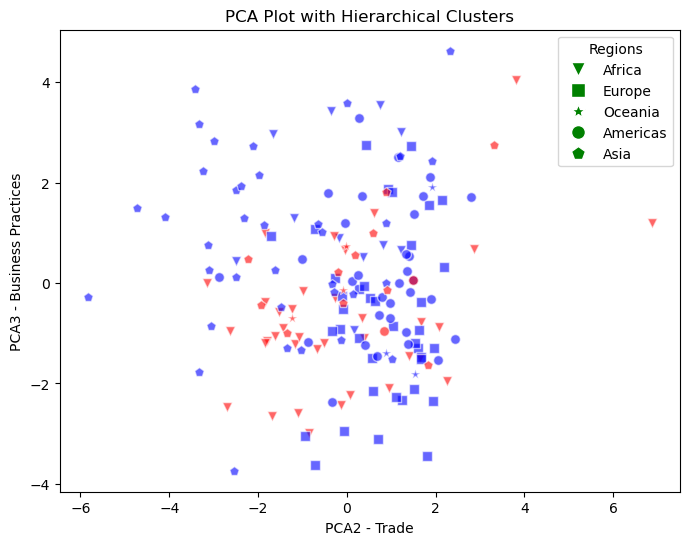

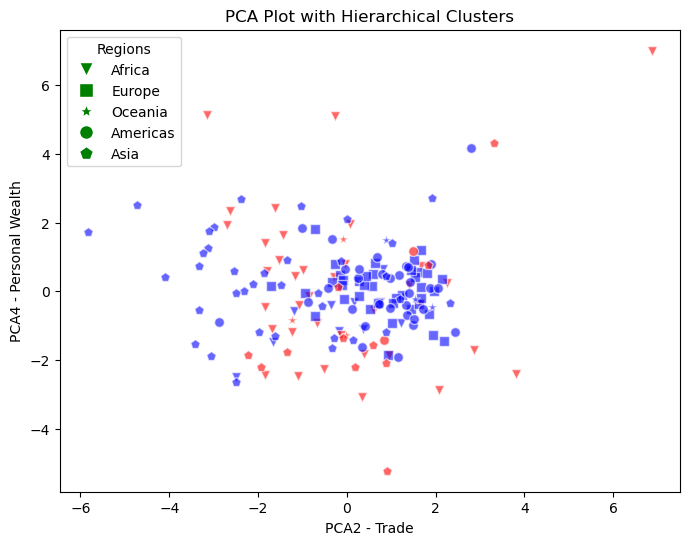

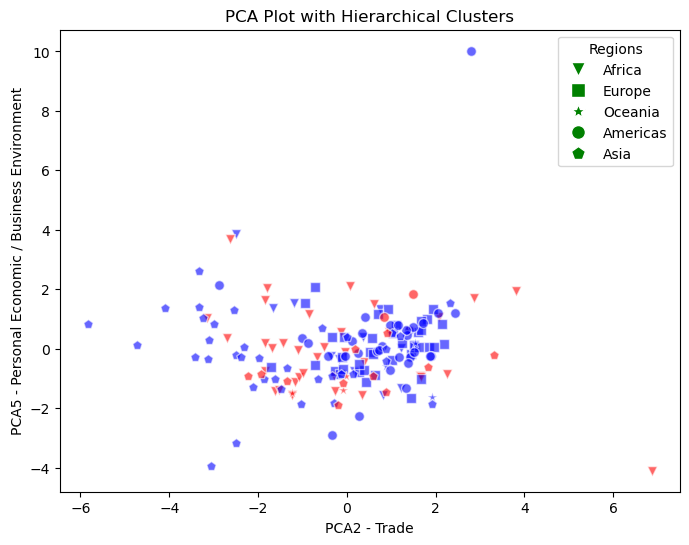

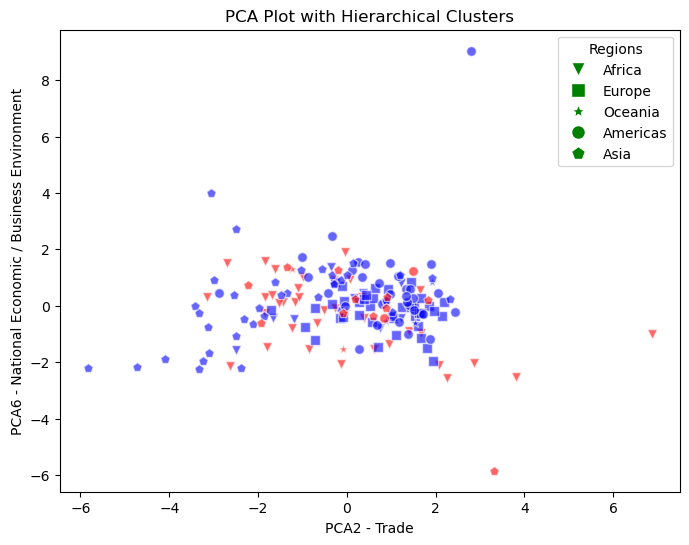

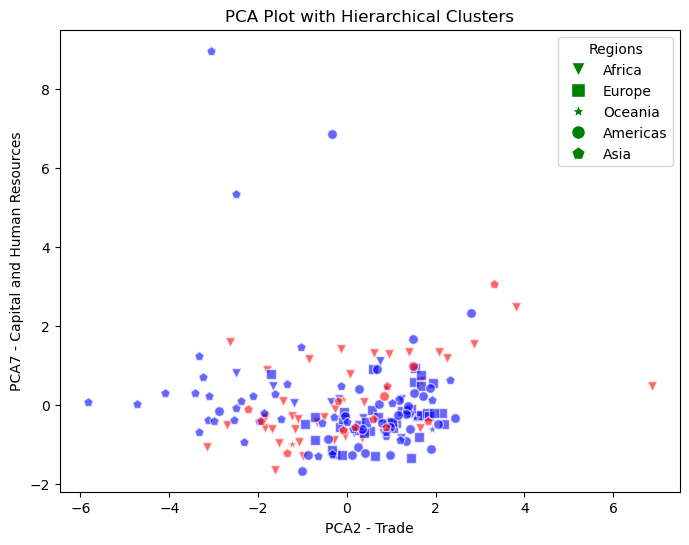

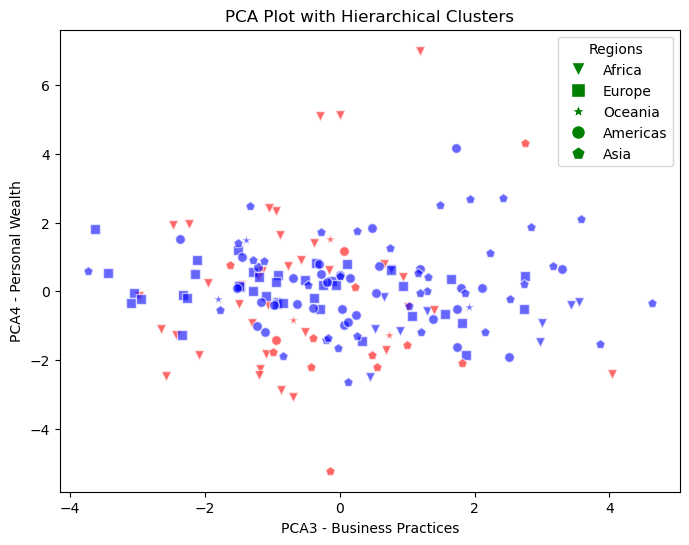

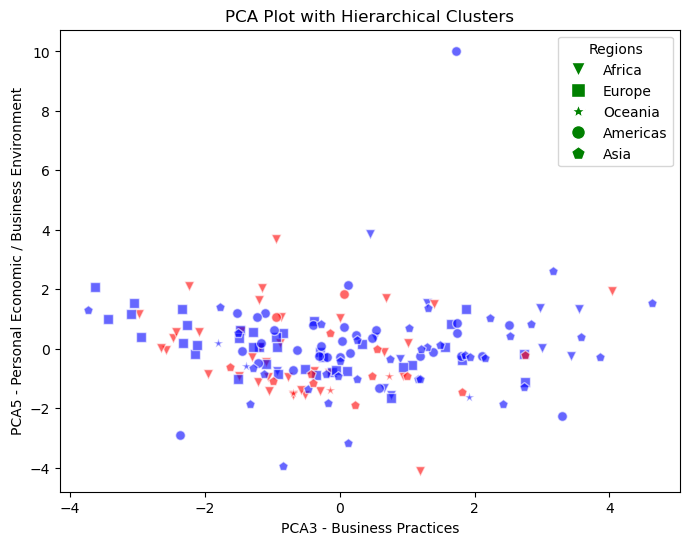

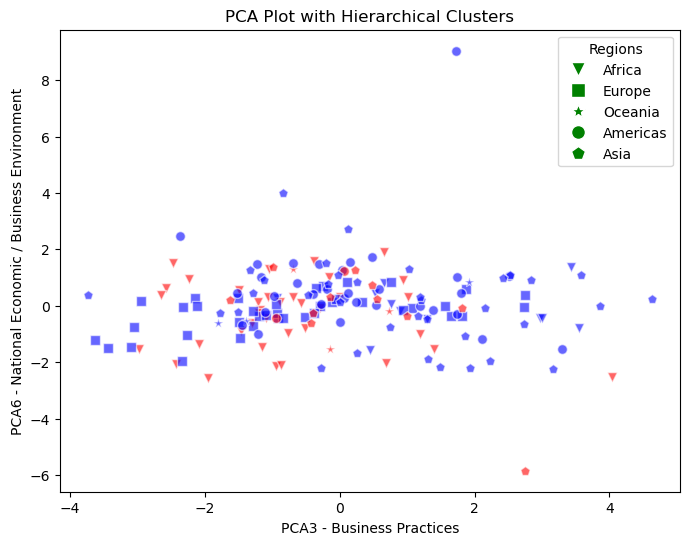

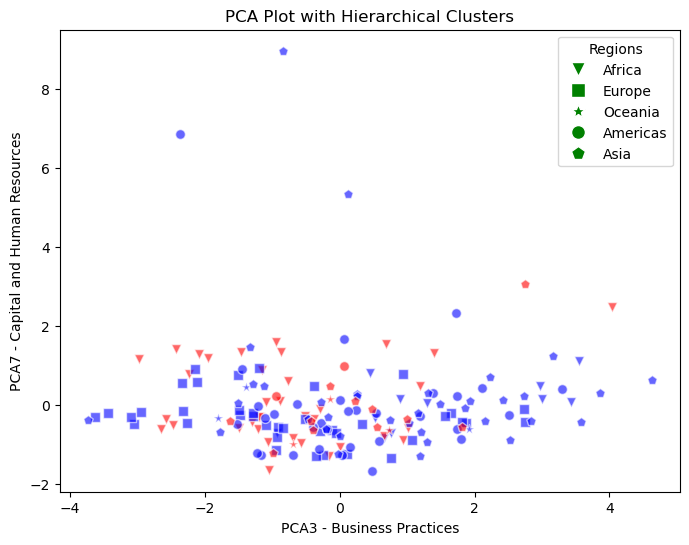

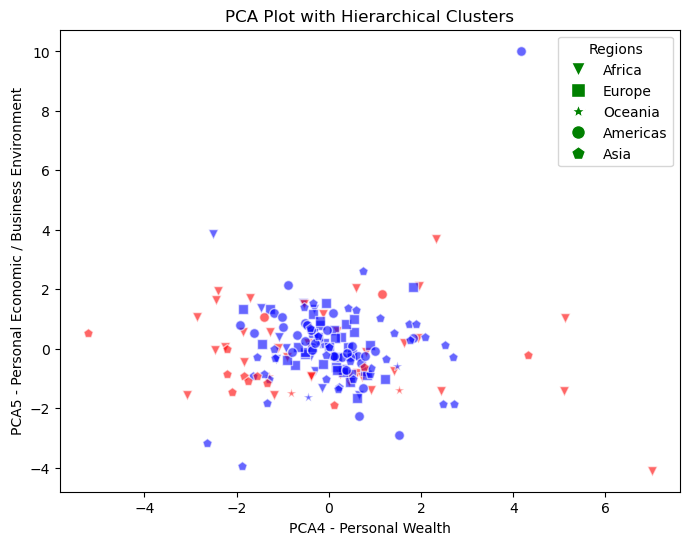

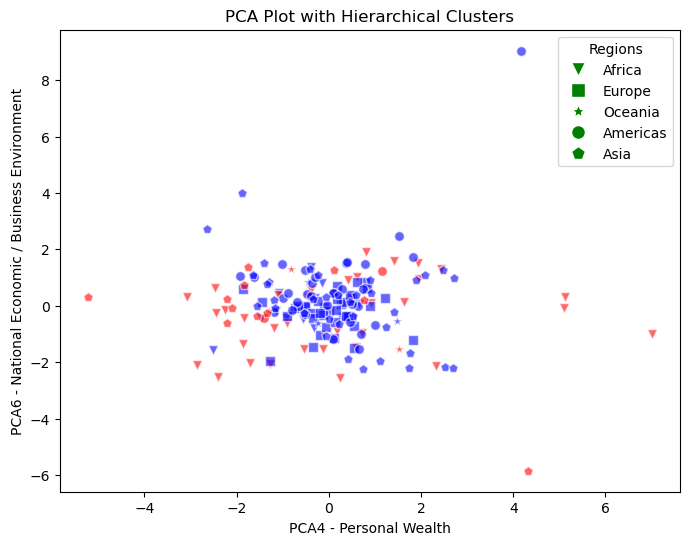

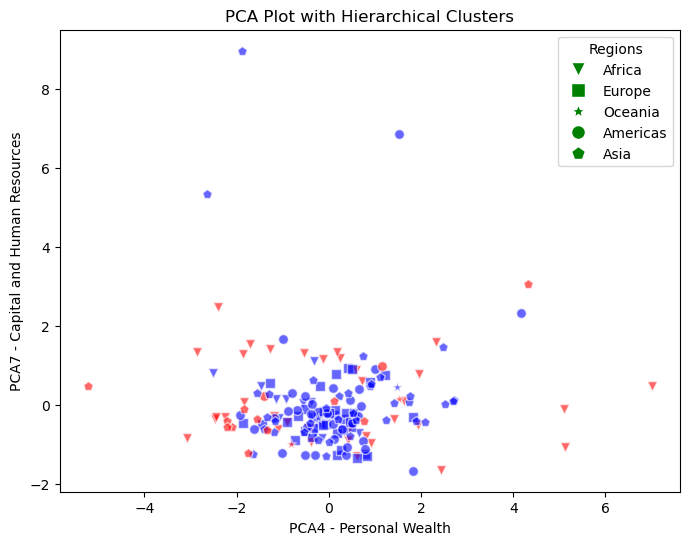

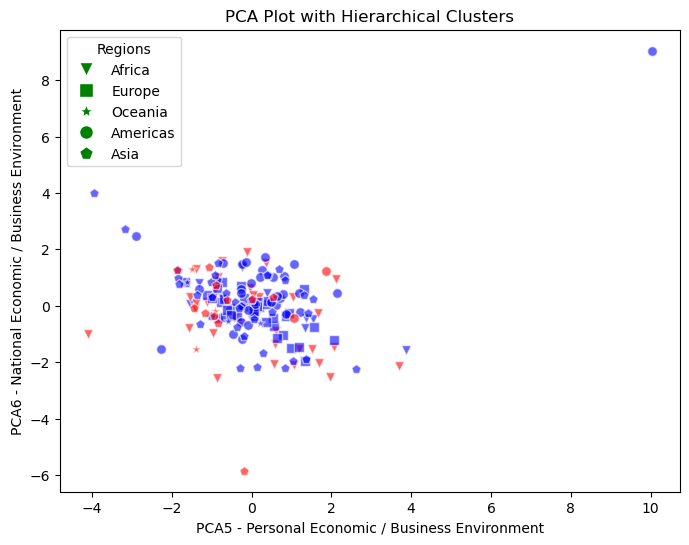

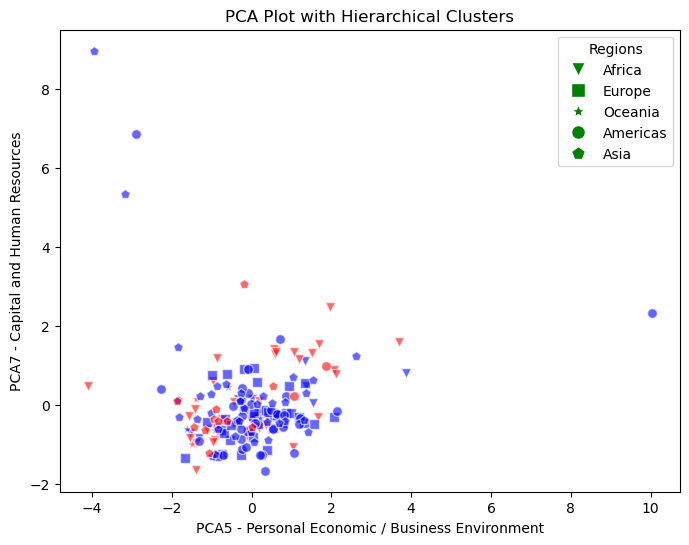

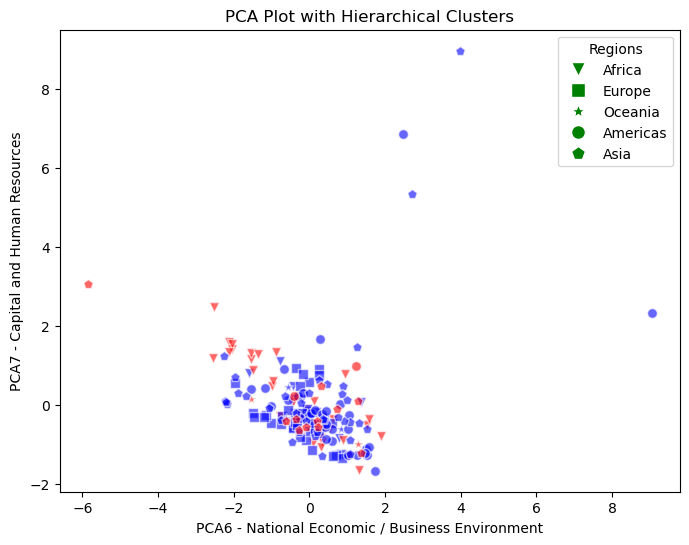

In [159]:
region_markers = {
    "Americas": "o",
    "Africa": "v",
    "Europe": "s",
    "Asia": "p",
    "Oceania": "*",
}

sub_markers = {
    "Latin America and the Caribbean": "D",
    "Sub-Saharan Africa": "P",
    "Southern Europe": "o",
    "Western Asia": "<",
    "Australia and New Zealand": "s",
    "Southern Asia": "v",
    "Eastern Europe": "h",
    "South-eastern Asia": ">",
    "Northern America": "p",
    "Eastern Asia": "^",
    "Northern Europe": "d",
    "Northern Africa": "*",
    "Melanesia": ".",
    "Central Asia": "8",
    "Polynesia": ".",
    "Western Europe": "X",
}

component_labels = {
    "PCA1": "PCA1 - Human Development",
    'PCA2': "PCA2 - Trade",
    "PCA3": "PCA3 - Business Practices",
    "PCA4": "PCA4 - Personal Wealth", 
    "PCA5": "PCA5 - Personal Economic / Business Environment",
    "PCA6": "PCA6 - National Economic / Business Environment",
    "PCA7": "PCA7 - Capital and Human Resources"
}

components = list(component_labels.keys())

regions = list(set(hierarchicalClusterData['region']))
sub_regions = list(set(hierarchicalClusterData['sub-region']))

def plot_data(X_LABEL, Y_LABEL, x, y):
    plt.figure(figsize=(8, 6))

    for region in regions:
        cluster_0 = hierarchicalClusterData[(hierarchicalClusterData['cluster'] == 0) & (hierarchicalClusterData['region'] == region)]
        cluster_1 = hierarchicalClusterData[(hierarchicalClusterData['cluster'] == 1) & (hierarchicalClusterData['region'] == region)]

        plt.scatter(x=cluster_0[x], y=cluster_0[y], c='blue', label='Cluster 0', s=50, alpha=0.6, edgecolors='w', marker=region_markers[region])
        plt.scatter(x=cluster_1[x], y=cluster_1[y], c='red', label='Cluster 1', s=50, alpha=0.6, edgecolors='w', marker=region_markers[region])

    # Creating a legend manually
    legend_elements = []
    for region in regions:
        legend_elements.append(
            plt.Line2D([0], [0], marker=region_markers[region], color='w', label=region, markerfacecolor='green', markersize=10)
        )

    # # Add legend and labels
    plt.legend(handles=legend_elements, title='Regions')
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)
    plt.title('PCA Plot with Hierarchical Clusters')
    plt.show()

for i in range(len(component_labels)):
    for j in range(i + 1,len(component_labels)):
        plot_data(component_labels[components[i]], component_labels[components[j]], components[i], components[j])


### Metrics

In [153]:
hierarchicalClusterData = hierarchicalClusterData = pd.read_csv("../data/hierarchicalClusteringDataset.csv")

pca_components = hierarchicalClusterData.iloc[:, :26]
cluster_assignments = hierarchicalClusterData['cluster']
sil_score = metrics.silhouette_score(pca_components, cluster_assignments)
dbs = metrics.davies_bouldin_score(pca_components, cluster_assignments)

print(f"Silhouette Coefficient: {round(sil_score, 2)}")
print(f"Davies Bouldin Score: {round(dbs, 2)}")

Silhouette Coefficient: 0.26
Davies Bouldin Score: 1.62
